# Mobile Price Classification using Decision Tree


## Introduction

In this notebook, a Decision Tree Classifier is built to predict mobile phone price ranges based on various features.

The dataset comes from Kaggle's "Mobile Price Classification" dataset, available at: [https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)

## User Instructions

1. Download this Jupyter notebook.
2. Open Google Chrome.
3. Go to https://drive.google.com/
4. In Google Drive, upload the the `mobile_price_prediction_notebook_for_google_colab.ipynb` file, by clicking *New*, then *File Upload*, and then select `mobile_price_prediction_notebook_for_google_colab.ipynb`
5. Right-click on the uploaded file, then select *Open With*, then select *Google Colaboratory*. This should open the uploaded file (a Jupyter Notebook) with Google Colaboratory.
6. In the menu at the top of the screen, click *Runtime*, then click *Run all*. The code will begin to run. It make take a few minutes to run.
7. Scroll to the *Load the dataset* section of the Jupyter notebook. If needed, wait for the code in this cell to finish running. When the *Choose Files* button has appeared beneath the code, click on it, and then select the `train.csv` and `test.csv` files. Doing this will upload those files to this Jupyter Notebook in Google Colab, and will enable the code to resume execution.
8. Scroll to the *User provides input values for dependent variables; model predicts price range* section of this notebook (near the bottom of this notebook). If needed, wait for the code in earlier sections of this notebook to finish executing (the code cells will display a green checkmark, and possibly some output beneath them, once they have finished executing.)
9. Input any desired values (within the specified value ranges) for the dependent variables. Then, run the code cell in that section of this notebook by clicking the button with the triangle icon at the top left of that code cell. This will show the trained model's prediction of the price range in which a phone with those feature values would sell.

## Install Libraries

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
# !pip install warnings
# !pip install io
# !pip install os
!pip install numpy
!pip install matplotlib

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## Import Libraries

In [ ]:
from google.colab import drive
from google.colab import files

import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Exploration

### Load the dataset

In [ ]:
# Check if the required files are already uploaded in the current session
required_files = ['train.csv', 'test.csv']
missing_files = [file for file in required_files if not os.path.exists(file)]

if not missing_files:
  train_df = pd.read_csv('train.csv')
  test_df = pd.read_csv('test.csv')
  print("All required files already exist and have been loaded.")
else:
  while missing_files:
    print(f"Please upload the following files: {', '.join(missing_files)}")
    uploaded = files.upload()

    # Process each uploaded file
    for filename in uploaded.keys():
      if filename in missing_files:
          if filename == 'train.csv':
            train_df = pd.read_csv(io.BytesIO(uploaded[filename]))
          elif filename == 'test.csv':
            test_df = pd.read_csv(io.BytesIO(uploaded[filename]))
          print(f"Loaded {filename}")
          missing_files.remove(filename)

Please upload the following files: train.csv, test.csv


Saving test.csv to test.csv
Saving train.csv to train.csv
Loaded test.csv
Loaded train.csv


### Display dataset information

In [ ]:
print("Training dataset shape:", train_df.shape)

Training dataset shape: (2000, 21)


In [ ]:
print("First 5 rows of the training dataset:")
train_df.head()

First 5 rows of the training dataset:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
print("Missing values in the training dataset:")
print(train_df.isnull().sum())

Missing values in the training dataset:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [ ]:
print("Training Dataset information:")
train_df.info()

Training Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 no

In [ ]:
print("Statistical summary of the dataset:")
train_df.describe()

Statistical summary of the dataset:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Get the minimum and maximum values of each column of train_df

In [ ]:
def print_min_max_values(df):
  """
  Prints the minimum and maximum values for each column in a Pandas DataFrame.

  Args:
    df (pandas.DataFrame): Input DataFrame

  Returns:
     None

  """
  # Dictionary to store results
  # min_max_values = {}

  # Iterate through each column
  for column in df.columns:
    min_value = df[column].min()
    max_value = df[column].max()

    print(f"Column: {column}")
    print(f"Minimum value: {min_value}")
    print(f"Maximum value: {max_value}")
    print()

In [ ]:
print_min_max_values(train_df)

Column: battery_power
Minimum value: 501
Maximum value: 1998

Column: blue
Minimum value: 0
Maximum value: 1

Column: clock_speed
Minimum value: 0.5
Maximum value: 3.0

Column: dual_sim
Minimum value: 0
Maximum value: 1

Column: fc
Minimum value: 0
Maximum value: 19

Column: four_g
Minimum value: 0
Maximum value: 1

Column: int_memory
Minimum value: 2
Maximum value: 64

Column: m_dep
Minimum value: 0.1
Maximum value: 1.0

Column: mobile_wt
Minimum value: 80
Maximum value: 200

Column: n_cores
Minimum value: 1
Maximum value: 8

Column: pc
Minimum value: 0
Maximum value: 20

Column: px_height
Minimum value: 0
Maximum value: 1960

Column: px_width
Minimum value: 500
Maximum value: 1998

Column: ram
Minimum value: 256
Maximum value: 3998

Column: sc_h
Minimum value: 5
Maximum value: 19

Column: sc_w
Minimum value: 0
Maximum value: 18

Column: talk_time
Minimum value: 2
Maximum value: 20

Column: three_g
Minimum value: 0
Maximum value: 1

Column: touch_screen
Minimum value: 0
Maximum value:

## Data Visualization

### Feature histograms

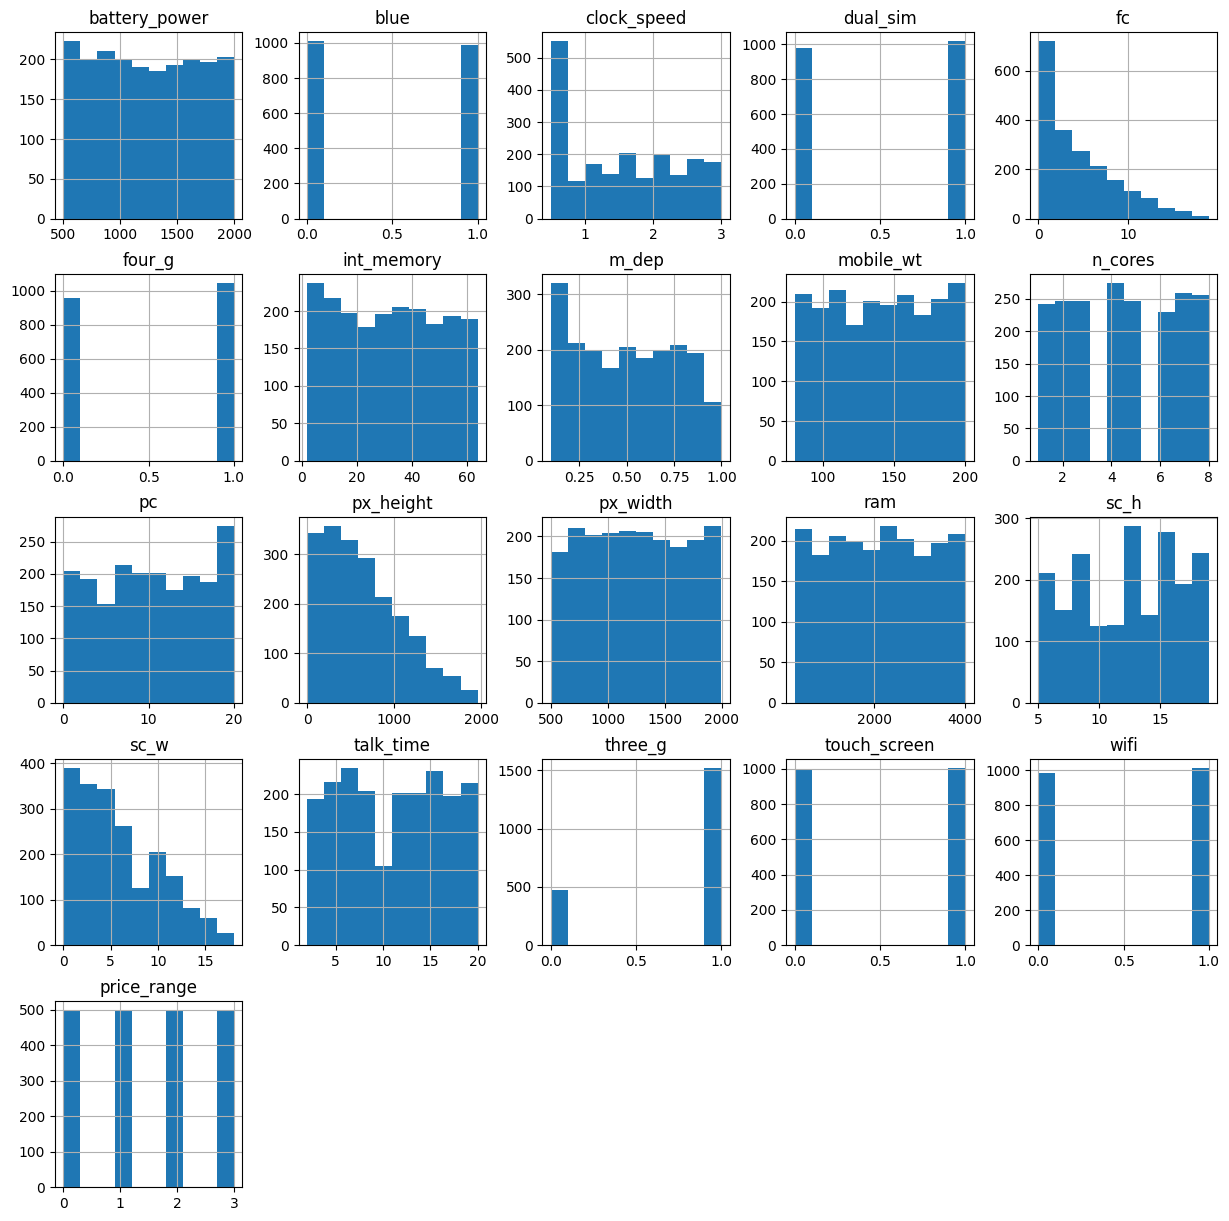

In [ ]:
train_df.hist(figsize=(15, 15))
plt.show()

### Pie Chart of Binary Features Distribution

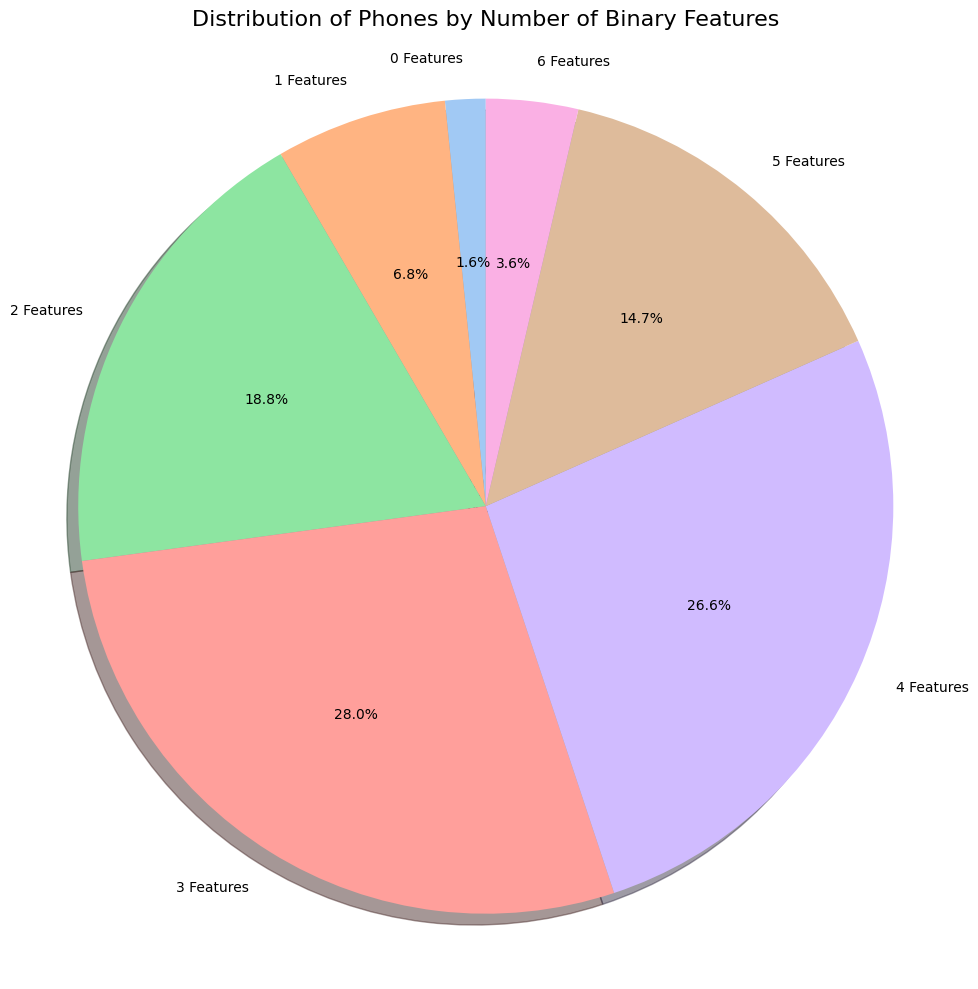

In [ ]:
# Create a more meaningful pie chart: distribution of phones by number of features they have
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

# Count how many of these features each phone has without modifying train_df
binary_feature_counts = train_df[binary_features].sum(axis=1).values

# Create a Series from the counts and get value counts
feature_count_distribution = pd.Series(binary_feature_counts).value_counts().sort_index()

# Create the labels
labels = [f"{count} Features" for count in feature_count_distribution.index]

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(feature_count_distribution, labels=labels, autopct='%1.1f%%',
        startangle=90, shadow=True,
        colors=sns.color_palette('pastel', len(feature_count_distribution)))

plt.title('Distribution of Phones by Number of Binary Features', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Correlation matrix

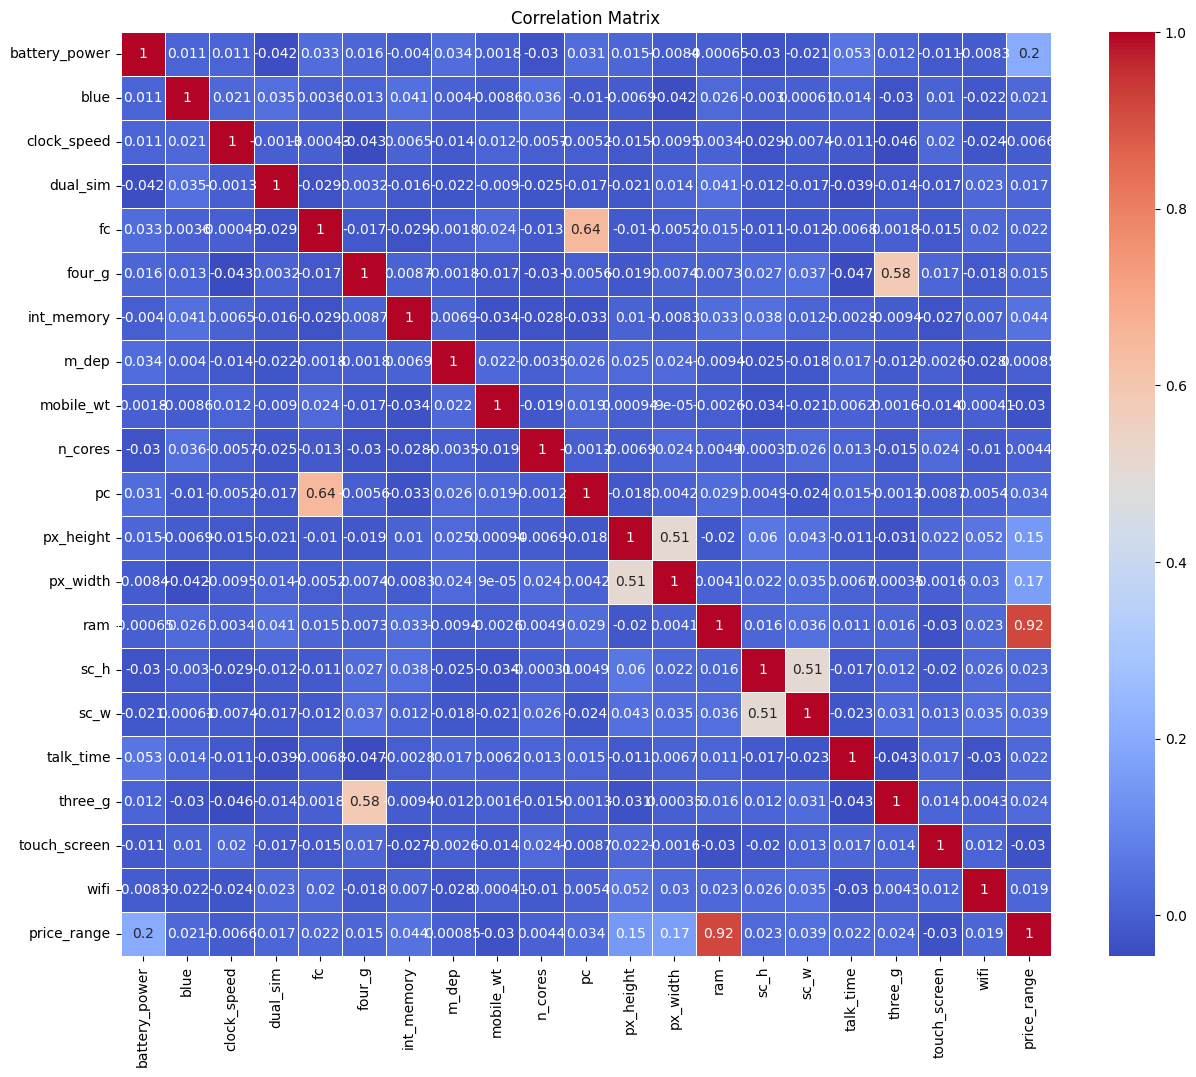

In [ ]:
plt.figure(figsize=(15, 12))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Visualize relationship between RAM and price_range

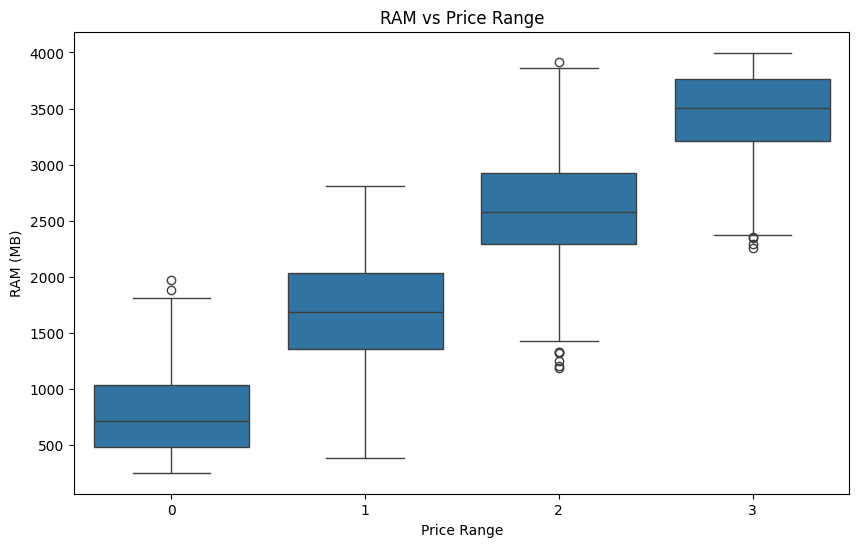

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='ram', data=train_df)
plt.title('RAM vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')
plt.show()

### Visualize relationship between battery power and price_range

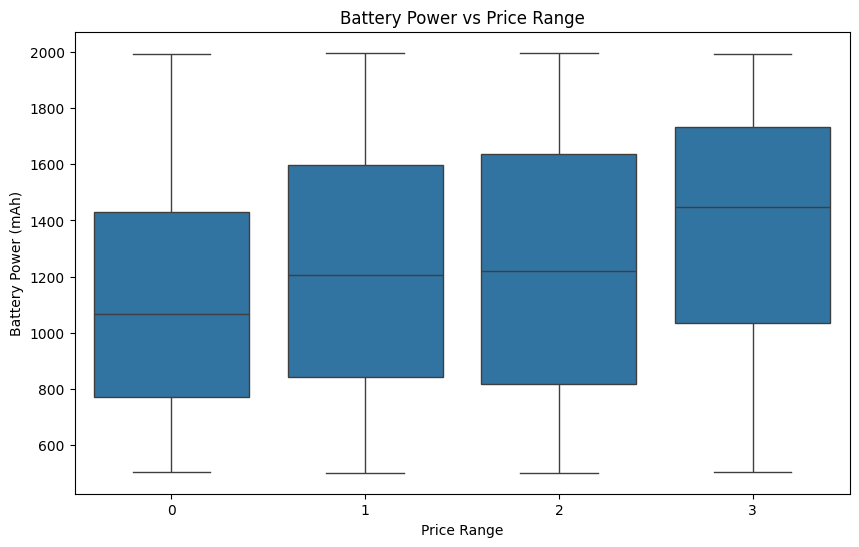

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='battery_power', data=train_df)
plt.title('Battery Power vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power (mAh)')
plt.show()

### Pair plot for a subset of features

<Figure size 1500x1000 with 0 Axes>

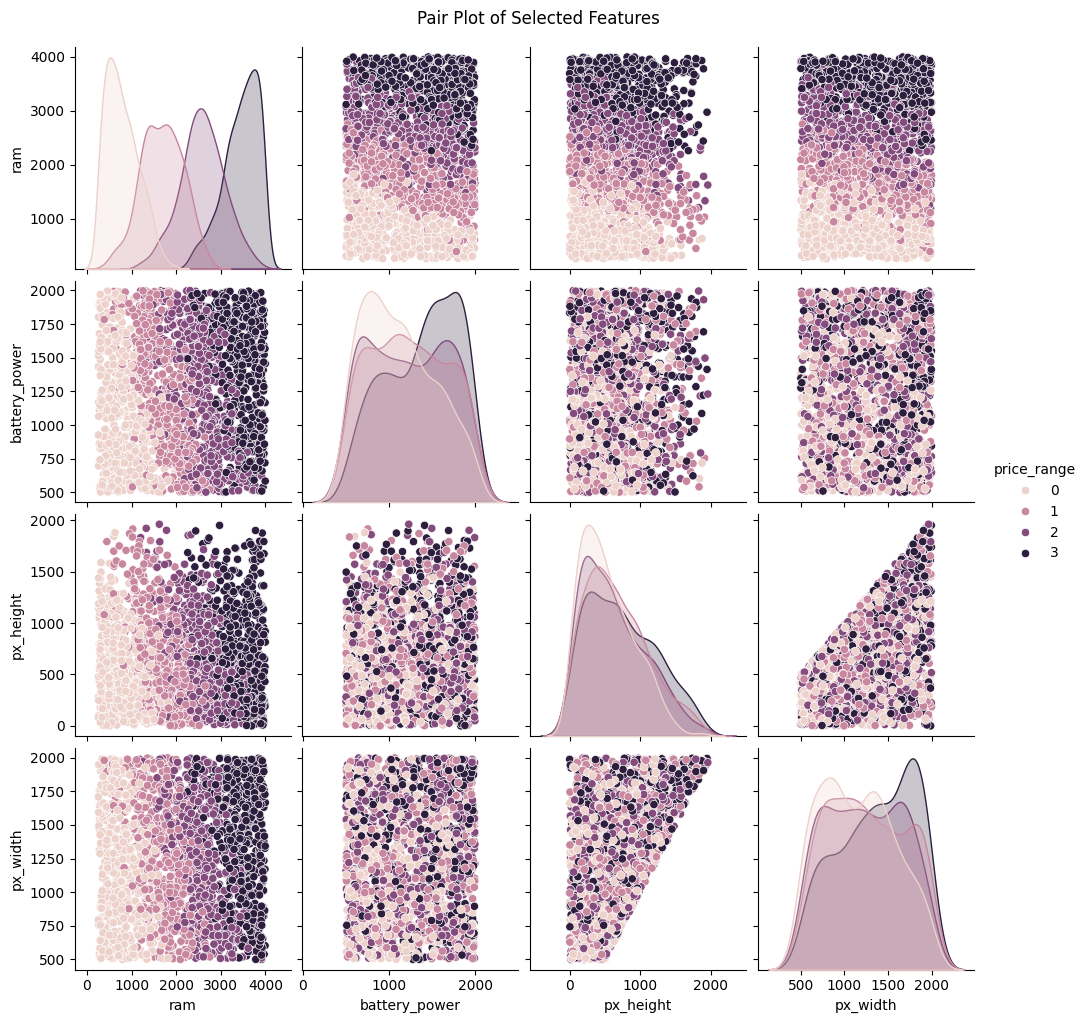

In [ ]:
features_to_plot = ['ram', 'battery_power', 'px_height', 'px_width', 'price_range']
plt.figure(figsize=(15, 10))
sns.pairplot(train_df[features_to_plot], hue='price_range')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

## Feature Engineering and Preprocessing

### Separate independent variables and dependent variable

In [ ]:
X = train_df.drop('price_range', axis=1)
y = train_df['price_range']

### Scale the features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1600, 20)
y_train shape: (1600,)
X_test shape: (400, 20)
y_test shape: (400,)


## Building and Training the Model, with Hyperpamater Selection via GridSearchCV

### Define the paramater grid for GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

### Initialize GridSearchCV

In [ ]:
grid_search = GridSearchCV(
  estimator=DecisionTreeClassifier(random_state=42),
  param_grid=param_grid,
  cv=5,
  scoring='accuracy',
  verbose=1,
  n_jobs=-1
)

### Fit GridSearchCV

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

### Get the best parameters

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


### Get the best estimator

In [ ]:
dt_classifier = grid_search.best_estimator_

### Make predictions with the best model

In [ ]:
y_pred = dt_classifier.predict(X_test)

### Make predictions

### Evaluate the model

In [ ]:
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation:
Accuracy: 0.8525

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       105
           1       0.77      0.87      0.81        91
           2       0.78      0.78      0.78        92
           3       0.92      0.87      0.89       112

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



### Confusion Matrix

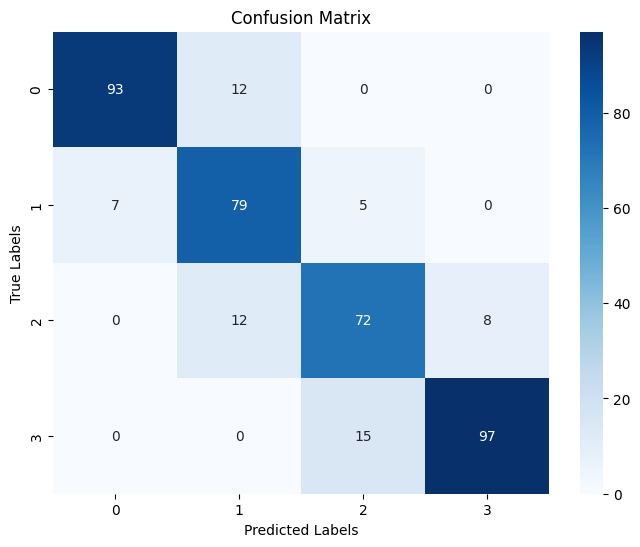

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Perform Cross-Validation

In [ ]:
cv_scores = cross_val_score(dt_classifier, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-Validation Results:")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Results:
Mean Accuracy: 0.8440
Standard Deviation: 0.0117


## Visualize the Decision Tree

### Plot the tree (limiting max_depth for visualization)

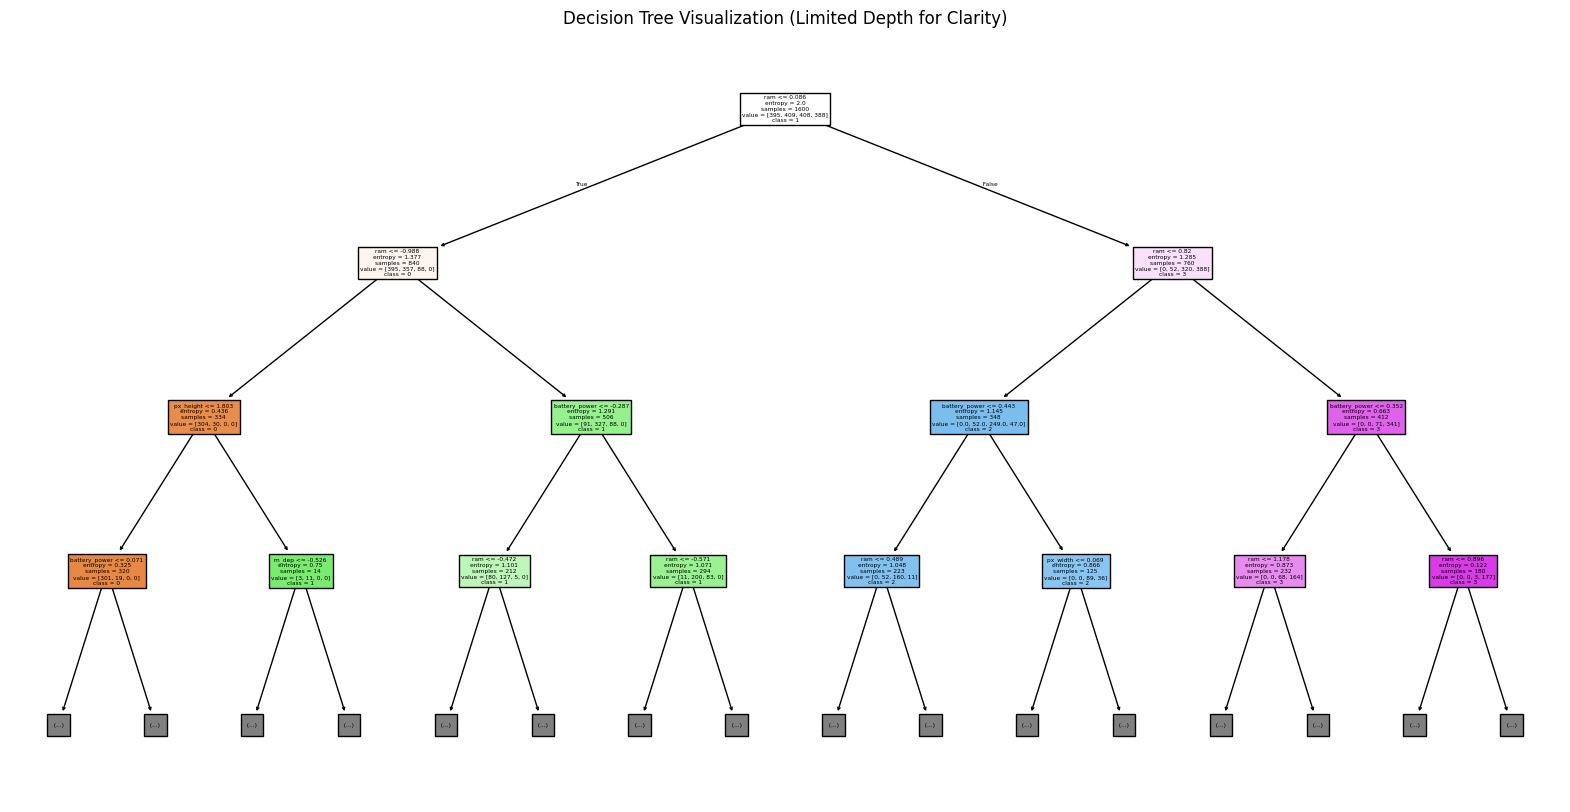

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3'], max_depth=3)
plt.title('Decision Tree Visualization (Limited Depth for Clarity)')
plt.show()

## Feature Imporatance

### Get feature importance

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

### Plot feature importance

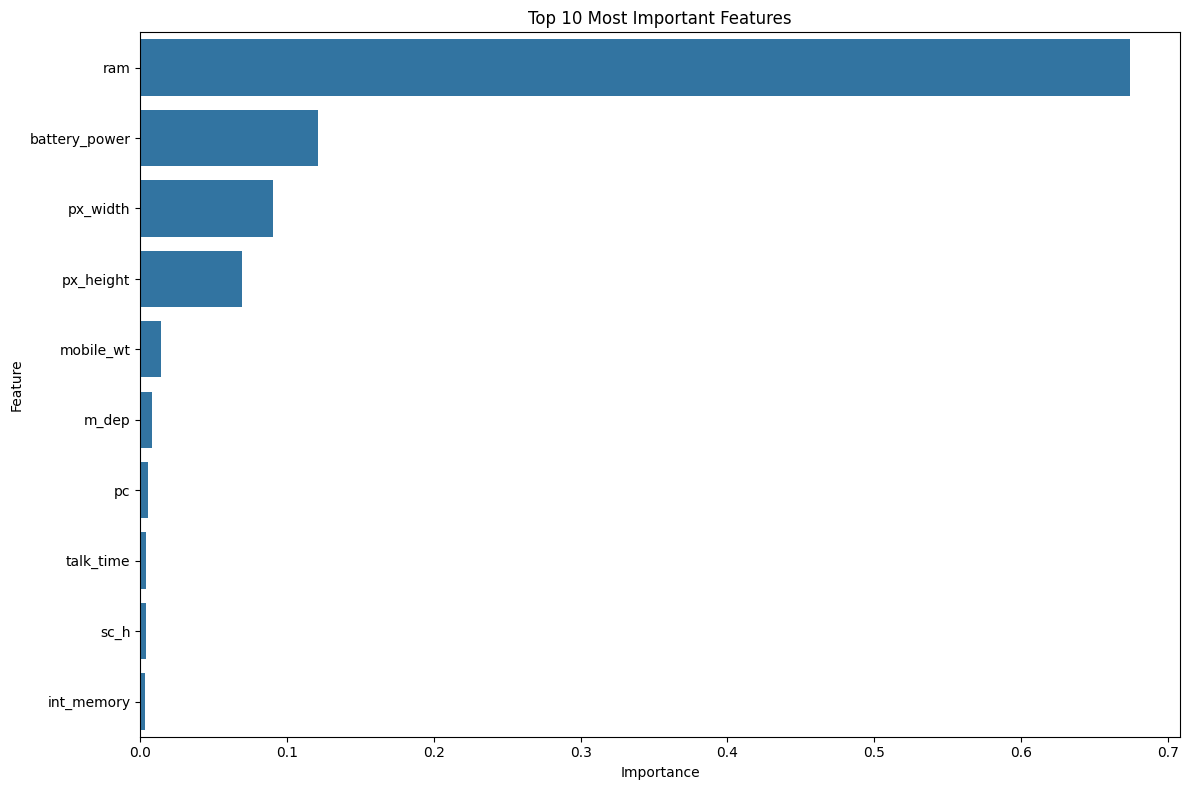

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

## Apply the Model to the Test Dataset

In [ ]:
# Make predictions on the test dataset
if 'price_range' not in test_df.columns:
  # Scale the test data
  test_df_final = test_df.drop('id', axis=1)
  X_test_final = scaler.transform(test_df_final)

  # Make predictions
  test_predictions = dt_classifier.predict(X_test_final)

  # Create a DataFrame with the predictions
  results = pd.DataFrame({
      'id': test_df.index,
      'price_range': test_predictions
    })

  # Display the first few predictions
  print("\nSample predictions for the test dataset:")
  print(results.head())

  # Save the predictions to a CSV file
  # results.to_csv('mobile_price_predictions.csv', index=False)


Sample predictions for the test dataset:
   id  price_range
0   0            3
1   1            3
2   2            2
3   3            3
4   4            1


## User provides input values for dependent variables; model predicts price range

Change the values of the dependent variables given below as desired, then run the cell (by clicking the button with the triangle icon at the top left of the cell below) to see the model's prediction of the price range in which a phone with the given values would sell.

In [ ]:
# User inputs - modify these values if desired
user_input = {
    'battery_power': 1500,  # Battery power in mAh (501-1998)
    'blue': 1,              # Bluetooth (0=No, 1=Yes)
    'clock_speed': 1.8,     # Clock speed (0.5-3.0)
    'dual_sim': 1,          # Dual SIM (0=No, 1=Yes)
    'fc': 8,                # Front Camera megapixels (0-19)
    'four_g': 1,            # 4G (0=No, 1=Yes)
    'int_memory': 32,       # Internal Memory in GB (2-64)
    'm_dep': 0.6,           # Mobile Depth in cm (0.1-1.0)
    'mobile_wt': 150,       # Weight of mobile phone (80-200)
    'n_cores': 4,           # Number of cores of processor (1-8)
    'pc': 12,               # Primary Camera megapixels (0-20)
    'px_height': 1280,      # Pixel Resolution Height (0-1960)
    'px_width': 720,        # Pixel Resolution Width (500-1998)
    'ram': 2500,            # RAM in MB (256-3998)
    'sc_h': 12,             # Screen Height in cm (5-19)
    'sc_w': 7,              # Screen Width in cm (0-18)
    'talk_time': 12,        # Talk Time in hours (2-20)
    'three_g': 1,           # 3G (0=No, 1=Yes)
    'touch_screen': 1,      # Touch Screen (0=No, 1=Yes)
    'wifi': 1               # WiFi (0=No, 1=Yes)
}

# Convert to DataFrame
input_df = pd.DataFrame([user_input])

# Scale the input
input_scaled = scaler.transform(input_df)

# Make prediction
prediction = dt_classifier.predict(input_scaled)[0]

# Define price ranges for clarity
price_ranges = ['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost']

# Print the prediction
print(f"Predicted Price Range: {price_ranges[prediction]} (Category {prediction})")


Predicted Price Range: High Cost (Category 2)


## Conclusion

In this notebook, a Decision Tree Classifier was built to predict mobile phone price ranges based on various features.
The model was trained, evaluated, and improved through hyperparameter tuning.

Key findings:

1. The Decision Tree model achieved good accuracy in predicting mobile phone price ranges.
2. Hyperparameter tuning helped improve the model's performance.
3. The most important features for predicting price range were identified and visualized.
4. Cross-validation confirmed the model's robustness across different data splits.